| ![nsdf](https://www.sci.utah.edu/~pascucci/public/visoar-logo-tight.png)  | [ViSOAR](http://visoar.com/) [Jupyter notebook](https://jupyter.org/) <br> created by  [Valerio Pascucci](http://cedmav.com/) and  [Giorgio Scorzelli](https://www.sci.utah.edu/people/scrgiorgio.html)  |  
|---|:---:|


# Distribution of the data related by the following book chapter: 

### Cahpter 1.18 - Retinal Connectomics 

__Authors:__  _[Bryan W. Jones](http://marclab.org/outreach/people/bryan-w-jones/), and [Robert E. Marc.](https://marclab.org/outreach/people/robert-e-marc/)_ 

__Published in:__  The Senses: A Comprehensive Reference, Elsevier, 2nd Edition - September 8, 2020, Pages 320-343, ISBN  9780128054086

https://www.elsevier.com/books/the-senses-a-comprehensive-reference/fritzsch/978-0-12-805408-6


#  <center> This is a preview of the 6.4 TB of EM data
![Connectomics EM Data](https://www.sci.utah.edu/~pascucci/public/RabbitRetinaEM.gif)

### <center>  Import modules and install them if missing. Check print message to see if the kernel should be restarted.

In [1]:
# import os,sys
# def restartkernel() :
#     display_html('''<script>Jupyter.notebook.kernel.restart(); 
#     //setTimeout(function(){IPython.notebook.execute_all_cells();
#     }, 100)</script>''',raw=True)

# try:
#     import matplotlib.pyplot as plt, skimage, OpenVisus as ov, getversion as gv, packaging as pk
#     if pk.version.parse(gv.get_module_version(ov)[0]) < pk.version.parse("2.1.184"):
#         !"{sys.executable}" -m pip install matplotlib scikit-image getversion packaging --upgrade OpenVisus 
#         restartkernel()
# except:
#     !"{sys.executable}" -m pip install matplotlib scikit-image getversion packaging --upgrade OpenVisus 
#     from IPython.display import display_html
#     print()
#     print("************************************************************")
#     print("** Restarting jupyter kernel to use new modules installed **")
#     print("**          Evaluate all cells from the beginning.        **")
#     print("************************************************************")
#     restartkernel()

In [2]:
import matplotlib.pyplot as plt, skimage, OpenVisus as ov, getversion as gv, packaging as pk, numpy as np

Starting OpenVisus C:\Users\Vlaerio's PC\AppData\Roaming\Python\Python37\site-packages\OpenVisus\__init__.py 3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)] sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0) ...


# <center> Connect to dataset and print basic information

In [3]:
load_local_data = True
#load_local_data = False

In [4]:

RabbitRetinaEM=ov.LoadDataset('http://atlantis.sci.utah.edu/mod_visus?dataset=rabbit&cached=1')
print("Scalar fields names=",RabbitRetinaEM.getFields())
(X1,Y1),(X2,Y2) = RabbitRetinaEM.getLogicBox()
print("Dataset dimensions=",(X1,Y1),(X2,Y2))

Scalar fields names= ['EM']
Dataset dimensions= (0, 0) (131072, 131072)


# <center> Get a slice and display

In [5]:
if load_local_data:
    print("The data is already avaible locally")
else:
    resolution = -6
    slice = RabbitRetinaEM.getXYSlice(resolution = resolution,resample_output=False)
    xSlice,ySlice = slice.shape
    print("Slice dimensions=",xSlice,ySlice)
    print('Datatype:', slice.dtype)
    volume = np.zeros((340,xSlice, xSlice), dtype=np.uint8)


The data is already avaible locally


In [6]:
if load_local_data:
    print("The data is already avaible locally")
else:
    for z in range(340):
        #print("Start slice ",z)
        slice = RabbitRetinaEM.getXYSlice(resolution = resolution,resample_output=False, time = z+1)
        #print("Slice dimensions=",slice.shape)
        #print('Datatype:', slice.dtype)
        print("Slice ",z," done",end="                    \r")

        volume[z,:,:] = slice
        del slice
        #print("Done slice ",z)
    np.save("RabbitRetinaEM_volume_340_2048_2048.npy", volume)

The data is already avaible locally


In [7]:
if load_local_data:
    inputfile = open('RabbitRetinaEM_volume_340_2048_2048.npy', 'rb')
    volume = np.load(inputfile)
    inputfile.close()
    print(volume.shape)

(340, 2048, 2048)


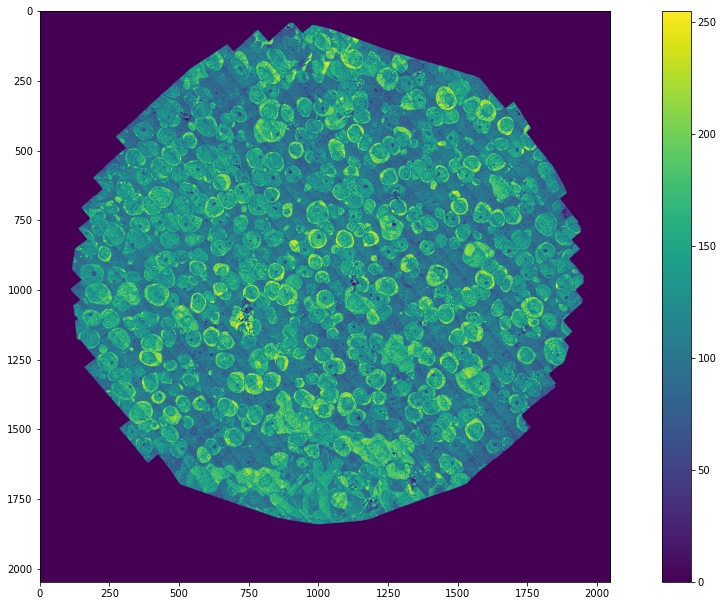

In [8]:
fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18.5, 10.5)

slice = volume[10,:,:]

im = plots.imshow(slice) 
plt.colorbar(im)
plt.show()

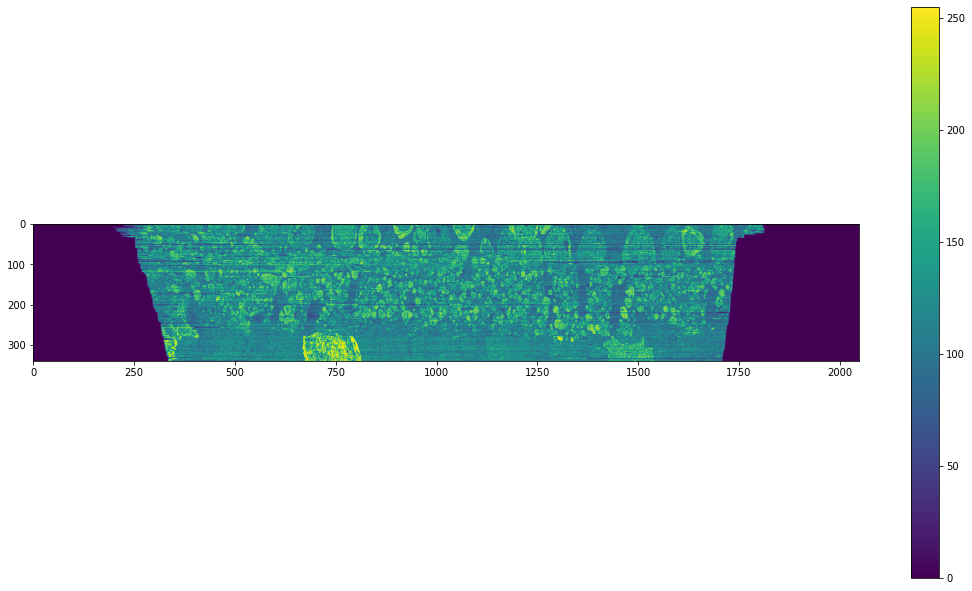

In [9]:
fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18.5, 10.5)

slice = volume[:,512,:]

im = plots.imshow(slice) 
plt.colorbar(im)
plt.show()

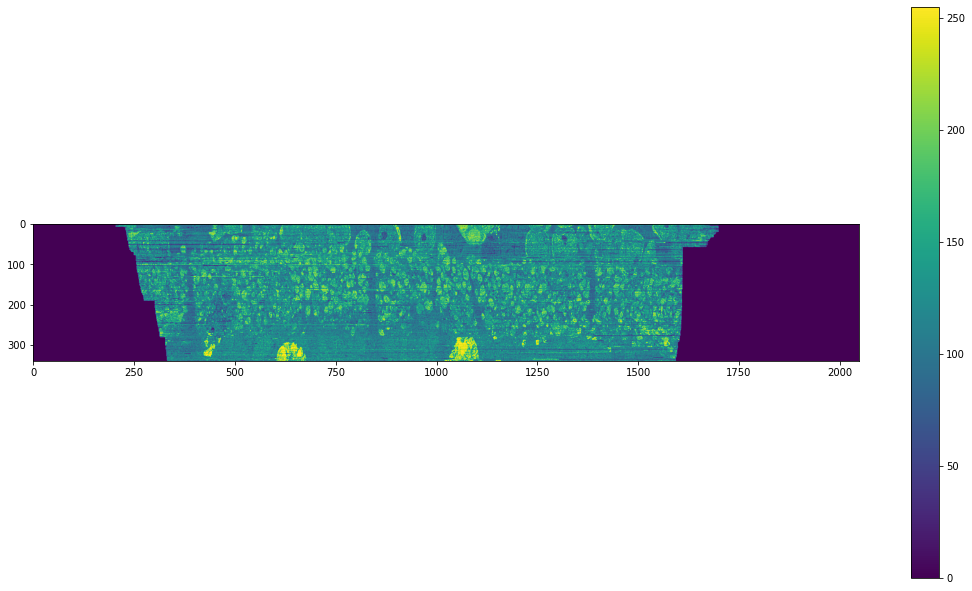

In [10]:
fig, plots = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18.5, 10.5)

slice = volume[:,:,512]

im = plots.imshow(slice) 
plt.colorbar(im)
plt.show()

---------------------------
Copyright (c) 2021 **Valerio Pascucci & Giorgio Scorzelli** 

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

**The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.** 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.